**On Importe les Packages**

Le code que vous avez fourni semble être une importation de bibliothèques Python couramment utilisées pour l'analyse de données et la visualisation. Voici une brève explication de chaque ligne :

1. `import numpy as np`: Importe la bibliothèque NumPy, qui est largement utilisée pour les opérations mathématiques, en particulier avec des tableaux multidimensionnels. L'alias "np" est couramment utilisé pour référencer NumPy.

2. `import pandas as pd`: Importe la bibliothèque Pandas, une bibliothèque très populaire pour la manipulation et l'analyse des données. L'alias "pd" est souvent utilisé pour référencer Pandas.

3. `import seaborn as sns`: Importe la bibliothèque Seaborn, qui est une extension de Matplotlib et permet de créer des visualisations statistiques attrayantes et informatives.

4. `import matplotlib as mpl`: Importe la bibliothèque Matplotlib, une bibliothèque de traçage 2D en Python.

5. `import matplotlib.pyplot as plt`: Importe la sous-bibliothèque pyplot de Matplotlib, qui offre une interface orientée objet pour créer des tracés.

6. `from collections import Counter`: Importe la classe Counter de la bibliothèque collections, qui est souvent utilisée pour compter le nombre d'occurrences d'éléments dans une séquence.

7. `import matplotlib.patches as mpatches`: Importe le module patches de Matplotlib, qui est utilisé pour créer des objets de patch (par exemple, des rectangles ou des cercles) pour personnaliser les graphiques.

8. `sns.set_style("white")`: Configure le style esthétique des tracés Seaborn. Dans ce cas, le style "white" est défini, ce qui donne un fond de tracé blanc.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")

Ce code utilise `plt.rcParams` pour définir plusieurs paramètres de configuration par défaut pour les tracés créés avec Matplotlib. Voici une explication ligne par ligne :

1. `plt.rcParams["axes.labelsize"] = 16.` : Définit la taille par défaut de la police pour les étiquettes des axes à 16 points.

2. `plt.rcParams["xtick.labelsize"] = 14.` : Définit la taille par défaut de la police pour les étiquettes des graduations sur l'axe des x à 14 points.

3. `plt.rcParams["ytick.labelsize"] = 14.` : Définit la taille par défaut de la police pour les étiquettes des graduations sur l'axe des y à 14 points.

4. `plt.rcParams["legend.fontsize"] = 12.` : Définit la taille par défaut de la police pour les légendes à 12 points.

5. `plt.rcParams["figure.figsize"] = [15., 6.]` : Définit la taille par défaut de la figure à une largeur de 15 pouces et une hauteur de 6 pouces.


In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [29]:
battles = pd.read_csv("../data/battles.csv")
character_deaths = pd.read_csv("../data/character-deaths.csv")
character_predictions = pd.read_csv("../data/character-predictions.csv")

In [30]:
# Ajoute une colonne "defender_count" au DataFrame "battles"
# Compte le nombre de défenseurs présents dans chaque bataille
battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis=1))

# Ajoute une colonne "attacker_count" au DataFrame "battles"
# Compte le nombre d'attaquants présents dans chaque bataille
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis=1))

# Ajoute une colonne "att_comm_count" au DataFrame "battles"
# Compte le nombre de commandants d'attaquants dans chaque bataille
battles.loc[:, "att_comm_count"] = [len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]

# Ajoute une colonne "no_of_books" au DataFrame "character_predictions"
# Compte le nombre de livres dans lesquels chaque personnage apparaît
character_predictions.loc[:, "no_of_books"] = character_predictions[[x for x in character_predictions.columns if x.startswith("book")]].sum(axis=1)


# Analayse des données



## Événements majeurs de décès par année

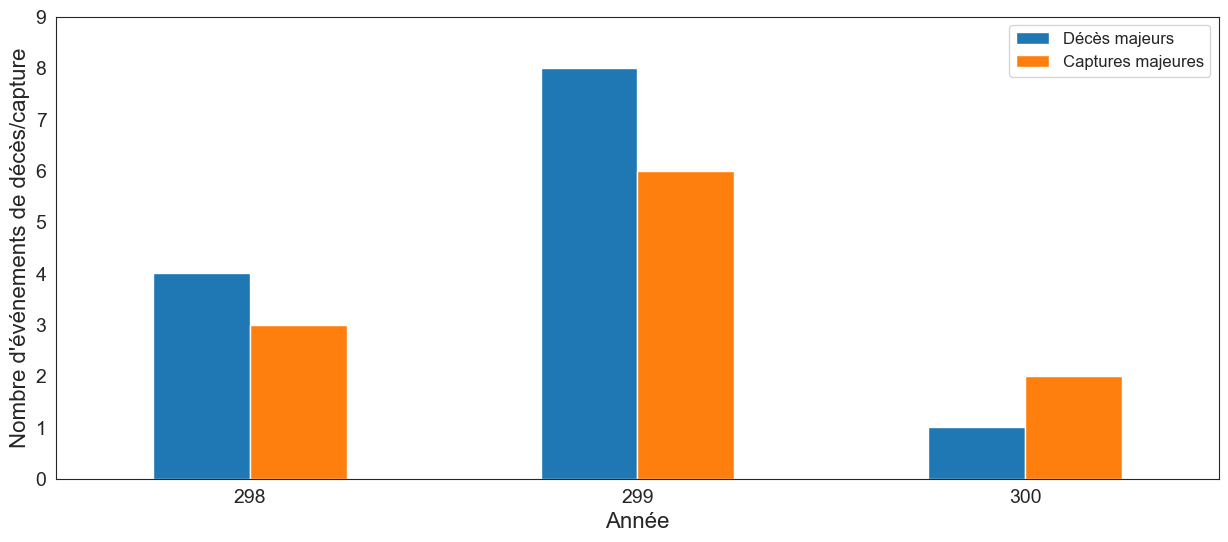

In [31]:
# Regroupe les données dans le DataFrame "battles" par année ('year') et calcule la somme des événements de décès majeurs et de captures majeures
# Sélectionne uniquement les colonnes "major_death" et "major_capture"
grouped_data = battles.groupby('year').sum()[["major_death", "major_capture"]]

# Crée un graphique à barres à partir des données groupées
# La rotation de l'axe des x est définie à 0 degrés pour afficher les années horizontalement
p = grouped_data.plot.bar(rot=0)

# Définit les étiquettes des axes x et y ainsi que la limite y (ylim) du graphique
_ = p.set(xlabel="Année", ylabel="Nombre d'événements de décès/capture", ylim=(0, 9))

# Ajoute la légende au graphique avec les noms "Major Deaths" et "Major Captures"
_ = p.legend(["Décès majeurs", "Captures majeures"])


## Impact de la taille de l’armée sur les résultats

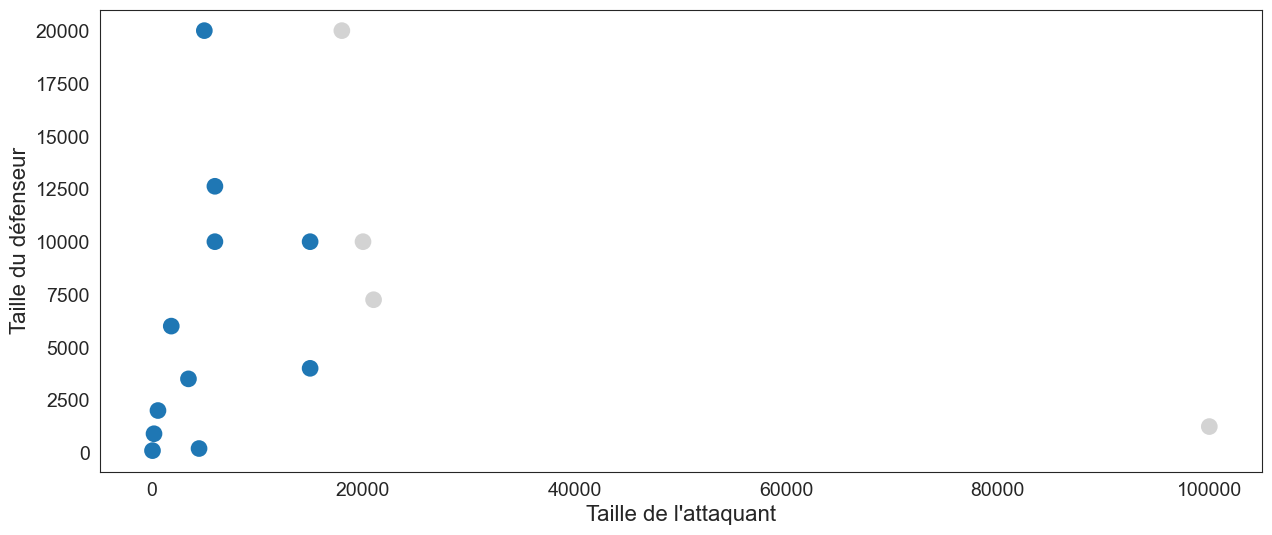

In [32]:
# Crée une copie du DataFrame "battles" en éliminant les lignes avec des valeurs manquantes dans les colonnes spécifiées
# Les colonnes considérées sont "attacker_size", "defender_size", et "attacker_outcome"
data = battles.dropna(axis=0, subset=["attacker_size", "defender_size", "attacker_outcome"]).copy(deep=True)

# Crée une liste de couleurs en fonction des résultats de l'attaquant ("win" ou autre)
# Si l'attaquant a gagné, la couleur est extraite de la première couleur de la palette Seaborn, sinon, la couleur est "lightgray"
colors = [sns.color_palette()[0] if x == "win" else "lightgray" for x in data.attacker_outcome.values]

# Crée un graphique de dispersion (scatter plot) des tailles de l'attaquant par rapport aux tailles du défenseur
# La couleur des points est déterminée par la liste de couleurs précédemment créée
# Les points ont une taille (s) de 100 et une épaisseur de bordure (lw) de 2
p = data.plot.scatter("attacker_size", "defender_size", c=colors, s=100, lw=2.)

# Définit les étiquettes des axes x et y du graphique
_ = p.set(xlabel="Taille de l'attaquant", ylabel="Taille du défenseur")


##  À quelle fréquence y avait-il plus d’une grande maison du côté attaquant ?

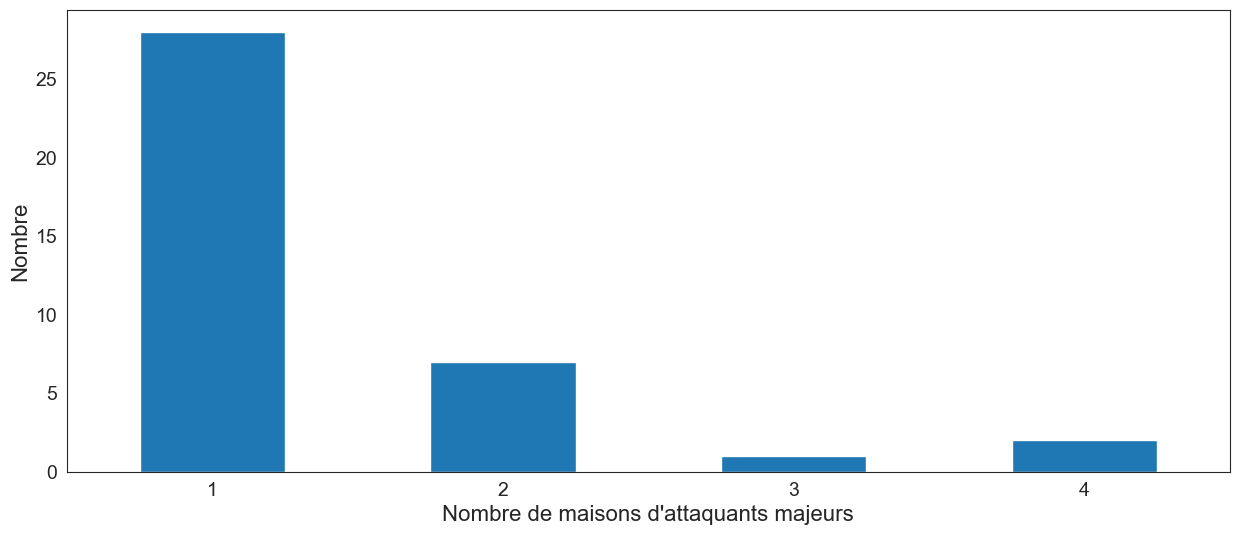

In [33]:
# Compte le nombre d'occurrences de chaque valeur dans la colonne "attacker_count" du DataFrame "battles"
# Les résultats sont triés par index (les valeurs uniques de "attacker_count")
# Ensuite, un graphique à barres est créé à partir des résultats
p = battles.attacker_count.value_counts().sort_index().plot.bar(rot=0)

# Définit les étiquettes des axes x et y du graphique
_ = p.set(xlabel="Nombre de maisons d'attaquants majeurs", ylabel="Nombre")


## Quelles paires ont mené le plus de batailles ?


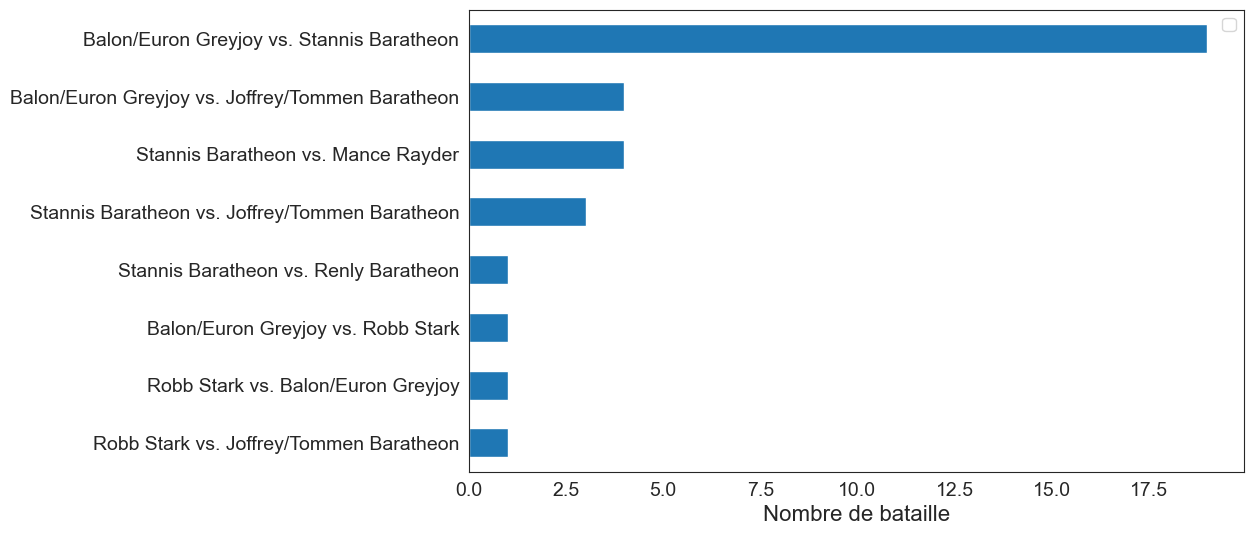

In [34]:
# Ignore les enregistrements où attacker_king ou defender_king est nul
# Ignore également un enregistrement où les deux ont la même valeur
# Utilise Counter pour compter le nombre d'occurrences de paires uniques (attacker_king, defender_king) après avoir éliminé les valeurs nulles
# Crée une liste de tuples avec les paires uniques et leur nombre d'occurrences
c = list(Counter([tuple(set(x)) for x in battles.dropna(subset=["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())

# Crée un DataFrame à partir de la liste de tuples, puis le trie par le deuxième élément du tuple (nombre d'occurrences)
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize=(10, 6))

# Personnalise le graphique en définissant les étiquettes de l'axe y comme des paires "attacker_king vs. defender_king"
# Définit l'étiquette de l'axe x comme "No. of Battles" et masque la légende
_ = p.set(yticklabels=["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel="Nombre de bataille"), p.legend("")


## Combien de commandants avaient les armées des différents rois ?




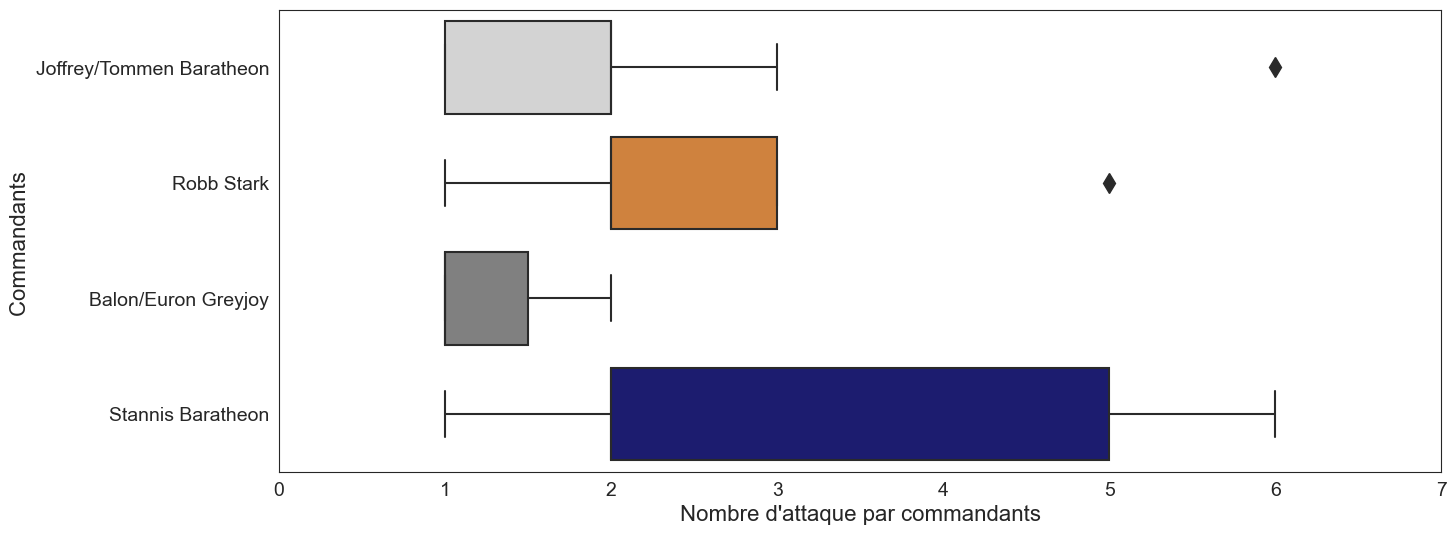

In [35]:
# Crée un graphique de boîte à moustaches pour visualiser la distribution du nombre de commandants d'attaquants en fonction du roi attaquant
# Utilise les données du DataFrame "battles"
# La saturation est définie à 0.6 pour ajuster l'intensité des couleurs, la taille des outliers est définie à 10, et une palette de couleurs spécifique est utilisée
p = sns.boxplot(x="att_comm_count", y="attacker_king", data=battles, saturation=0.6, fliersize=10., palette=["lightgray", sns.color_palette()[1], "grey", "darkblue"])

# Personnalise le graphique en définissant les étiquettes des axes x et y
# Définit les ticks de l'axe x pour afficher les valeurs de 0 à 7
_ = p.set(xlabel="Nombre d'attaque par commandants", ylabel="Commandants ", xticks=range(8))


## Combien d’événements majeurs de décès/captures se produisent dans chaque région ?


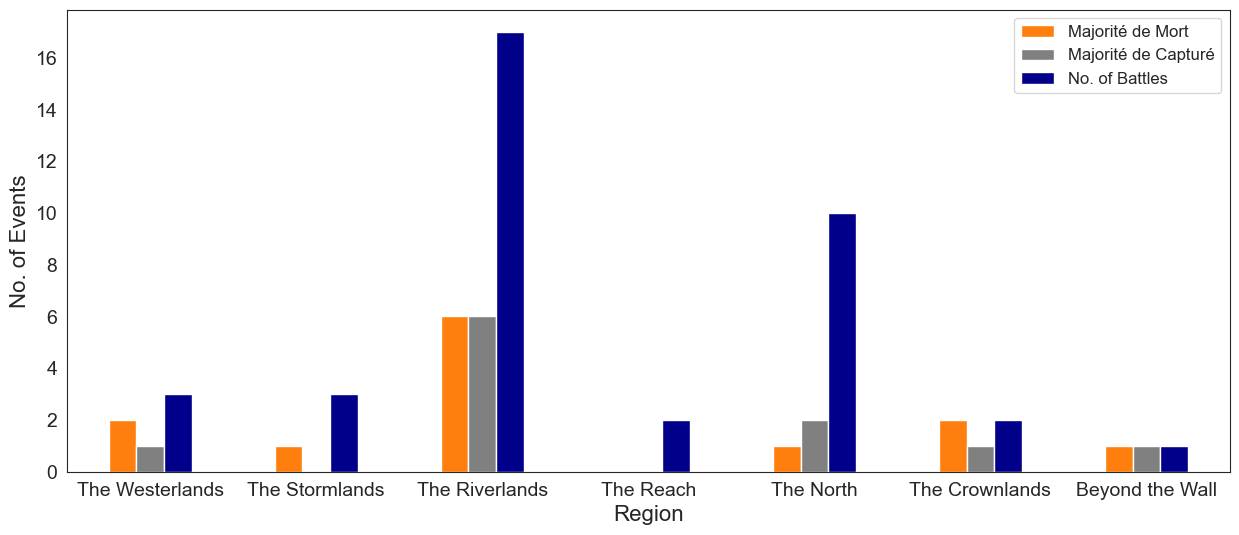

In [36]:
# Groupe les données par région, puis calcule la somme des colonnes "major_death" et "major_capture" pour chaque région
data = battles.groupby("region").sum()[["major_death", "major_capture"]]

# Compte le nombre d'événements par région en utilisant value_counts, puis concatène les deux DataFrames
# Le nouvel DataFrame a trois colonnes : major_death, major_capture, et le nombre total d'événements (battles.region.value_counts())
# Les résultats sont ensuite triés par la colonne "region" de manière décroissante
# Une copie profonde est créée pour éviter des modifications indésirables du DataFrame d'origine
p = pd.concat([data, battles.region.value_counts().to_frame()], axis=1).sort_values("region", ascending=False).copy(deep=True).plot.bar(color=[sns.color_palette()[1], "grey", "darkblue"], rot=0)

# Personnalise le graphique en définissant les étiquettes des axes x et y
# Ajoute la légende avec les noms "Major Deaths", "Major Captures", et "No. of Battles" avec une police de taille 12
_ = p.set(xlabel="Region", ylabel="No. of Events"), p.legend(["Majorité de Mort", "Majorité de Capturé", "No. of Battles"], fontsize=12.)



## Existe-t-il une relation entre la survie et le fait d'avoir des relations mortes ?

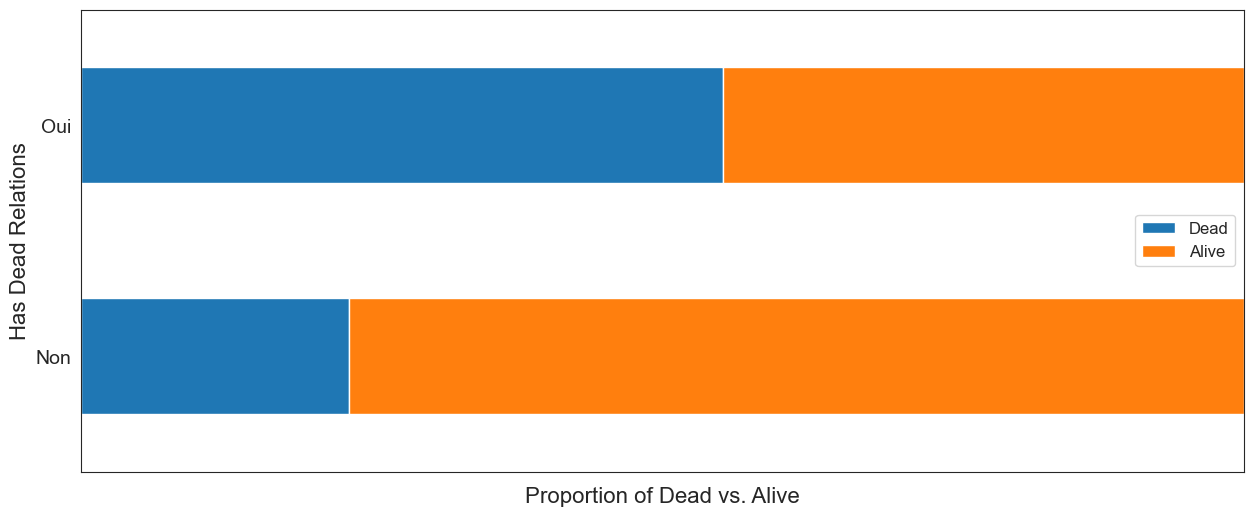

In [37]:
# Groupe les données character_predictions par les colonnes "boolDeadRelations" et "isAlive", compte le nombre de "S.No" pour chaque combinaison
# Utilise unstack() pour réorganiser les données et obtenir un DataFrame plus convivial pour le tracé
data = character_predictions.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"].unstack().copy(deep=True)

# Divise chaque valeur dans le DataFrame par la somme de sa ligne respective pour obtenir des proportions
# Utilise plot.barh pour créer un graphique à barres horizontales empilées
p = data.div(data.sum(axis=1), axis=0).plot.barh(stacked=True, rot=0, width=0.5)

# Personnalise le graphique en définissant les limites de l'axe x entre 0 et 1
# Définit les étiquettes des axes y et x, masque les étiquettes de l'axe x, et définit la légende
_ = p.set_xlim([0, 1]), p.set(yticklabels=["Non", "Oui"], xticklabels="", xlabel="Proportion of Dead vs. Alive", ylabel="Has Dead Relations"), p.legend(["Dead", "Alive"])


## Quel est le lien entre le fait d’apparaître dans davantage de livres et la survie ?

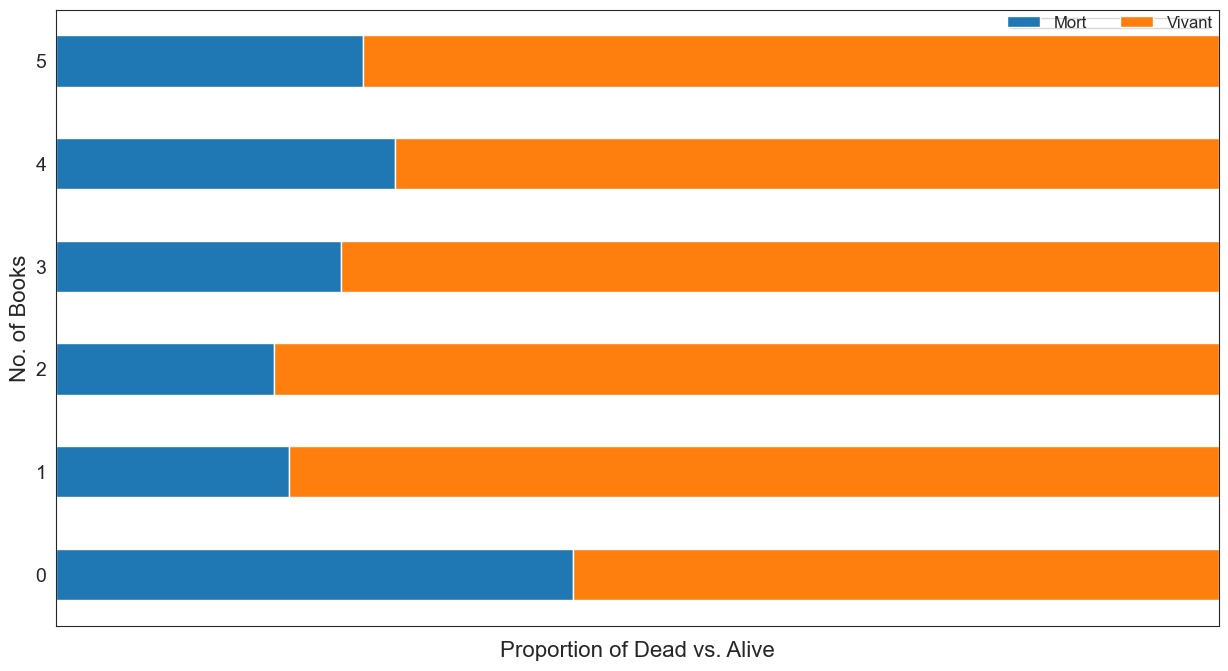

In [38]:
# Groupe les données character_predictions par les colonnes "no_of_books" et "isAlive", compte le nombre de "S.No" pour chaque combinaison
# Utilise unstack() pour réorganiser les données et obtenir un DataFrame plus convivial pour le tracé
data = character_predictions.groupby(["no_of_books", "isAlive"]).count()["S.No"].unstack().copy(deep = True)

# Divise chaque valeur dans le DataFrame par la somme de sa ligne respective pour obtenir des proportions
# Utilise plot.barh pour créer un graphique à barres horizontales empilées
# Personnalise le graphique avec une rotation de 0 degrés, une taille de figure de (15, 8), et une largeur de barre de 0.5
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 8), width = .5)

# Personnalise le graphique en définissant les étiquettes des axes x et y, les limites de l'axe x entre 0 et 1, et masque les étiquettes de l'axe x
# Ajoute une légende en haut à droite avec deux colonnes et ajuste la marge intérieure de la légende
_ = p.set(xticklabels = "", xlim = [0, 1], ylabel = "No. of Books", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Mort", "Vivant"], loc = "upper right", ncol = 2, borderpad = -.15)



Quel est le lien entre la culture et la survie ?

In [39]:
# Dictionnaire associant des cultures à des listes de termes associés
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Fonction pour obtenir la culture associée à un terme donné
def get_cult(value):
    # Convertit la valeur en minuscules pour une comparaison insensible à la casse
    value = value.lower()
    # Recherche la première clé (culture) où la valeur est présente dans la liste associée
    v = [k for (k, v) in cult.items() if value in v]
    # Retourne la culture trouvée, sinon retourne la valeur d'origine en majuscule
    return v[0] if len(v) > 0 else value.title()


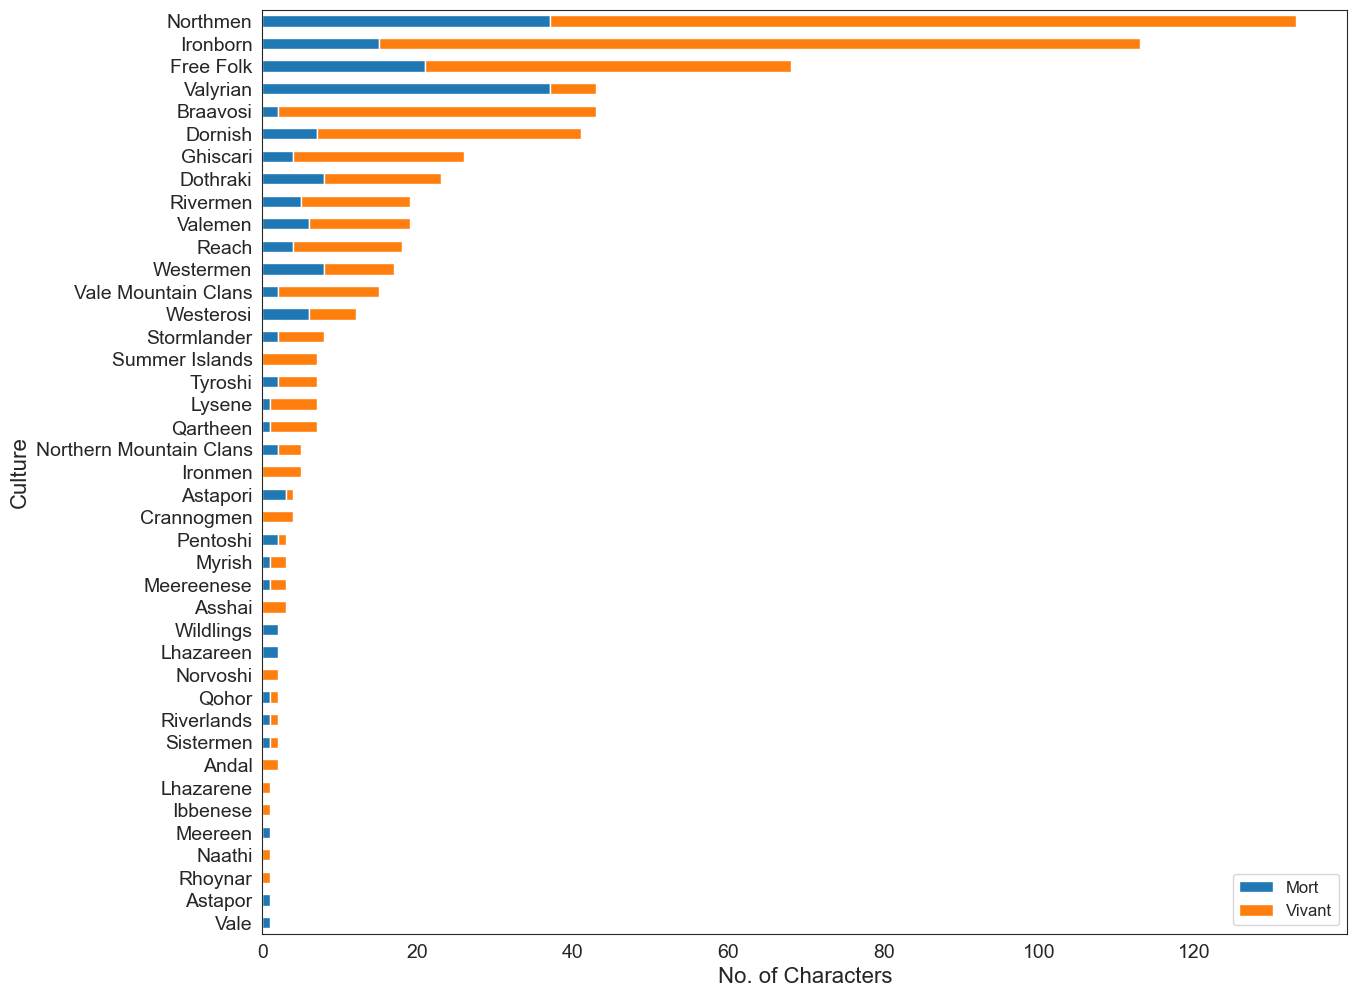

In [40]:
# Ajoute une nouvelle colonne "culture" au DataFrame character_predictions en utilisant la fonction get_cult
# Remplit les valeurs manquantes avec une chaîne vide
character_predictions.loc[:, "culture"] = [get_cult(x) for x in character_predictions.culture.fillna("")]

# Groupe les données en fonction de la culture et de la variable "isAlive" (vivant ou mort)
# Compte le nombre de personnages dans chaque catégorie et crée un DataFrame avec unstack()
data = character_predictions.groupby(["culture", "isAlive"]).count()["S.No"].unstack().copy(deep=True)

# Ajoute une colonne "total" représentant le nombre total de personnages dans chaque culture
data.loc[:, "total"] = data.sum(axis=1)

# Crée un graphique à barres horizontales empilées pour visualiser le nombre de personnages vivants et morts dans chaque culture
# Les cultures avec un total nul sont exclues du tracé
p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked=True, rot=0, figsize=(14, 12))

# Personnalise le graphique en définissant les étiquettes des axes x et y, et ajoute une légende en bas à droite
_ = p.set(xlabel="No. of Characters", ylabel="Culture"), p.legend(["Mort", "Vivant"], loc="lower right")


## Les armées plus grandes gagnent-elles nécessairement ?

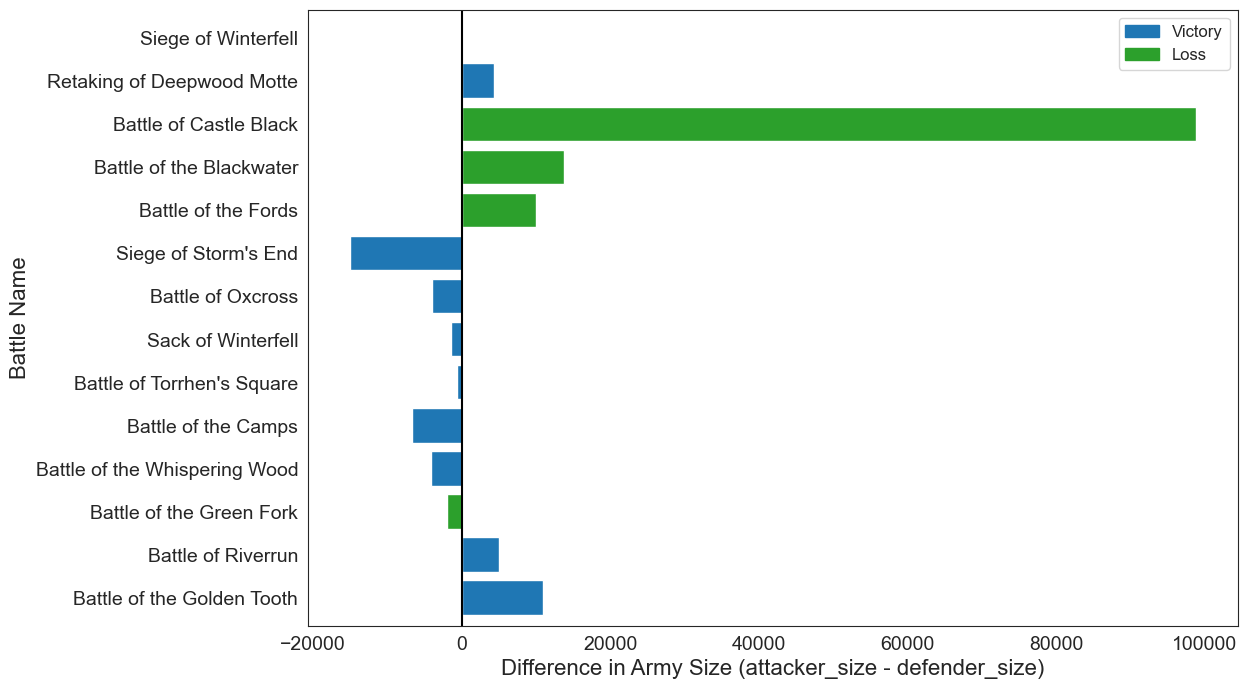

In [41]:
data = battles.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)
data = pd.concat([(data.attacker_size - data.defender_size).to_frame(), battles[["attacker_outcome"]]], axis = 1, join = "inner")
data = data[data[0] != 0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Victory", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = battles.name.iloc[data.index].values, xlabel = "Difference in Army Size (attacker_size - defender_size)", ylabel = "Battle Name")

In [42]:
death_preds = character_predictions.copy(deep = True)


## Y a-t-il un déséquilibre de classe ?

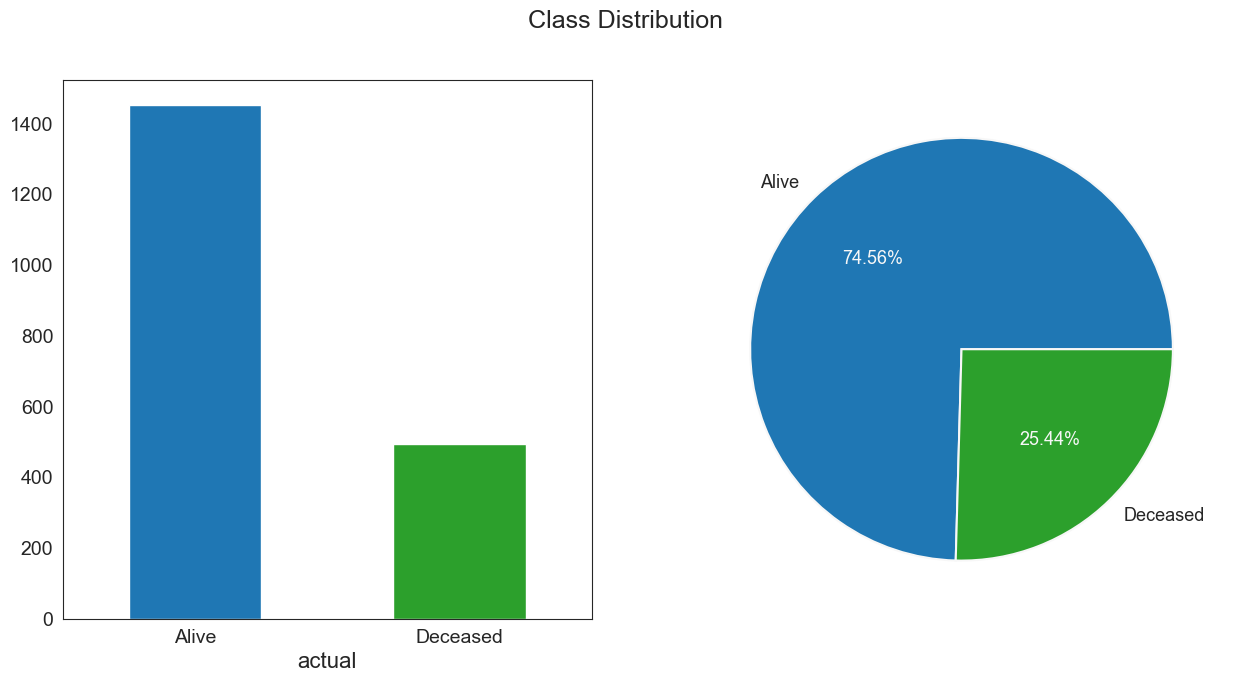

In [43]:
# Crée une figure avec deux sous-graphiques en une seule ligne
f, ax = plt.subplots(1, 2, figsize=(15, 7))

# Ajoute un titre à la figure
f.suptitle("Class Distribution", fontsize=18.)

# Tracé du graphique à barres (1er sous-graphique)
_ = death_preds.actual.value_counts().plot.bar(ax=ax[0], rot=0, color=(sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels=["Alive", "Deceased"])

# Tracé du graphique en secteurs (2ème sous-graphique)
_ = death_preds.actual.value_counts().plot.pie(labels=("Alive", "Deceased"), autopct="%.2f%%", label="", fontsize=13., ax=ax[1],\
                                                colors=(sns.color_palette()[0], sns.color_palette()[2]), wedgeprops={"linewidth": 1.5, "edgecolor": "#F7F7F7"})

# Personnalisation des couleurs du texte dans le graphique en secteurs
ax[1].texts[1].set_color("#F7F7F7")
ax[1].texts[3].set_color("#F7F7F7")


La répartition des classes indique un déséquilibre. Il y a bien plus de personnages vivants que morts. Il existe plusieurs façons bien connues de résoudre ce problème.

Le sous-échantillonnage et le suréchantillonnage sont deux des méthodes les plus simples. Dans ce cas, nous sous-échantillonnerons la classe majoritaire. Nous prélèverons environ 70 % d'échantillons sans remplacement dans la classe minoritaire des personnes décédées. Nous tirerons un nombre égal d'échantillons (~ 350) de la classe majoritaire Alive.

À l'aide de cette répartition train-test, nous allons construire et comparer deux modèles : un modèle de classificateur XGB et un modèle de régression logistique


# Predictive Experiment

In [18]:
from xgboost import plot_importance
from xgboost import XGBClassifier as XGBC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score

## Netoyyage

In [44]:
# Ajoute une nouvelle colonne "culture" au DataFrame death_preds en utilisant la fonction get_cult
# Remplit les valeurs manquantes avec une chaîne vide
death_preds.loc[:, "culture"] = [get_cult(x) for x in death_preds.culture.fillna("")]

# Factorise les colonnes catégorielles "title", "culture", "mother", "father", "heir", "house", "spouse"
# La factorisation convertit les valeurs catégorielles en entiers
death_preds.loc[:, "title"] = pd.factorize(death_preds.title)[0]
death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
death_preds.loc[:, "mother"] = pd.factorize(death_preds.mother)[0]
death_preds.loc[:, "father"] = pd.factorize(death_preds.father)[0]
death_preds.loc[:, "heir"] = pd.factorize(death_preds.heir)[0]
death_preds.loc[:, "house"] = pd.factorize(death_preds.house)[0]
death_preds.loc[:, "spouse"] = pd.factorize(death_preds.spouse)[0]

# Supprime certaines colonnes du DataFrame
death_preds.drop(["name", "alive", "pred", "plod", "isAlive", "dateOfBirth"],axis= 1, inplace=True)

# Modifie le nom des colonnes en supprimant les points et les soulignements, pour éviter d'éventuels problèmes
death_preds.columns = map(lambda x: x.replace(".", "").replace("_", ""), death_preds.columns)

# Remplace les valeurs manquantes par -1 dans le DataFrame
death_preds.fillna(value=-1, inplace=True)


## Y a-t-il un déséquilibre de classe ?

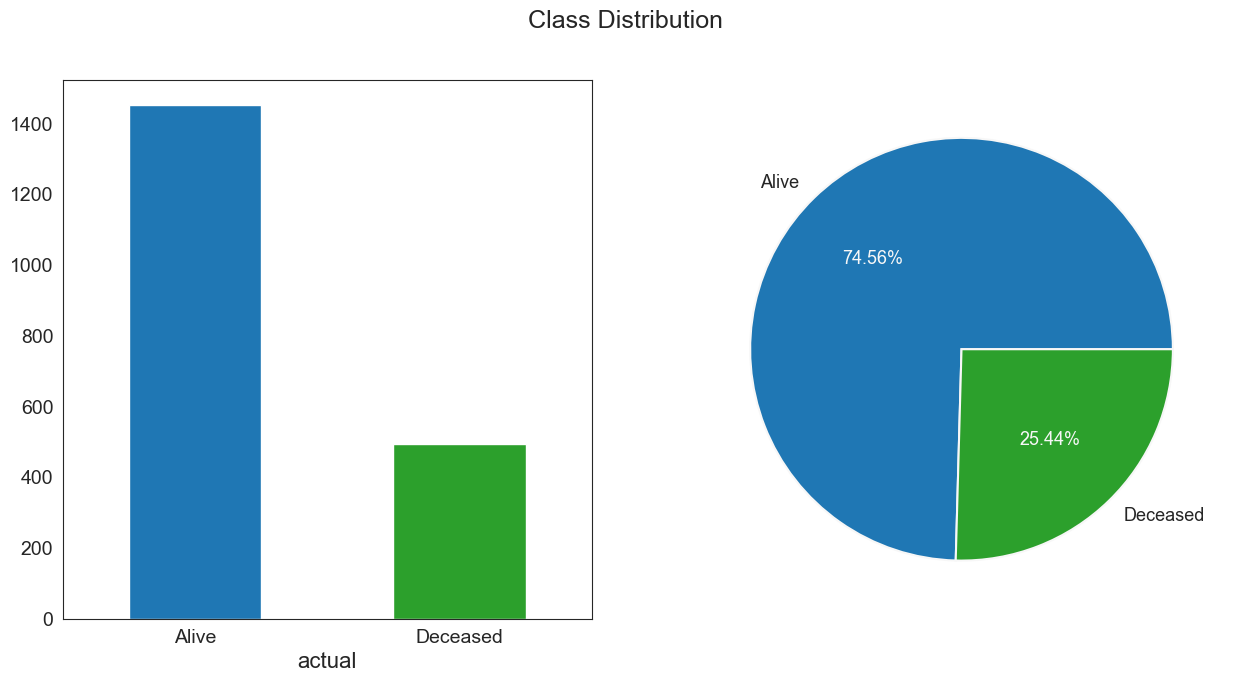

In [45]:
# Crée une figure avec deux sous-graphiques en une seule ligne
f, ax = plt.subplots(1, 2, figsize=(15, 7))

# Ajoute un titre à la figure
f.suptitle("Class Distribution", fontsize=18.)

# Tracé du graphique à barres (1er sous-graphique)
_ = death_preds.actual.value_counts().plot.bar(ax=ax[0], rot=0, color=(sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels=["Alive", "Deceased"])

# Tracé du graphique en secteurs (2ème sous-graphique)
_ = death_preds.actual.value_counts().plot.pie(labels=("Alive", "Deceased"), autopct="%.2f%%", label="", fontsize=13., ax=ax[1],\
                                                colors=(sns.color_palette()[0], sns.color_palette()[2]), wedgeprops={"linewidth": 1.5, "edgecolor": "#F7F7F7"})

# Personnalisation des couleurs du texte dans le graphique en secteurs
ax[1].texts[1].set_color("#F7F7F7")
ax[1].texts[3].set_color("#F7F7F7")


La répartition des classes indique un déséquilibre. Il y a bien plus de personnages vivants que morts. Il existe plusieurs façons bien connues de résoudre ce problème.

Le sous-échantillonnage et le suréchantillonnage sont deux des méthodes les plus simples. Dans ce cas, nous sous-échantillonnerons la classe majoritaire. Nous prélèverons environ 70 % d'échantillons sans remplacement dans la classe minoritaire des personnes décédées. Nous tirerons un nombre égal d'échantillons (~ 350) de la classe majoritaire Alive.

À l'aide de cette répartition train-test, nous allons construire et comparer deux modèles : un modèle de classificateur XGB et un modèle de régression logistique

In [48]:
# Select randomly 350 samples from the "Alive" class (actual == 0) and 350 samples from the "Deceased" class (actual == 1)
# Use the same initial state of the random number generator to reproduce results (random_state = 62)
alive_samples = death_preds[death_preds.actual == 0].sample(350, random_state=62)
deceased_samples = death_preds[death_preds.actual == 1].sample(350, random_state=62)

# Concatenate the two DataFrames
X = pd.concat([alive_samples, deceased_samples], ignore_index=True).astype(np.float64)

# Create the target variable Y from the "actual" column of the training set X
Y = X.actual.values


# Crée un ensemble de test (tX, tY) en sélectionnant les échantillons qui ne sont pas dans l'ensemble d'entraînement
tX = death_preds[~death_preds.index.isin(X.index)].copy(deep=True).astype(np.float64)
tY = tX.actual.values

# Supprime certaines colonnes des ensembles d'entraînement et de test
X.drop(["SNo", "actual", "DateoFdeath"], axis=1, inplace=True)
tX.drop(["SNo", "actual", "DateoFdeath"], axis=1, inplace=True)


# XGB Classifier

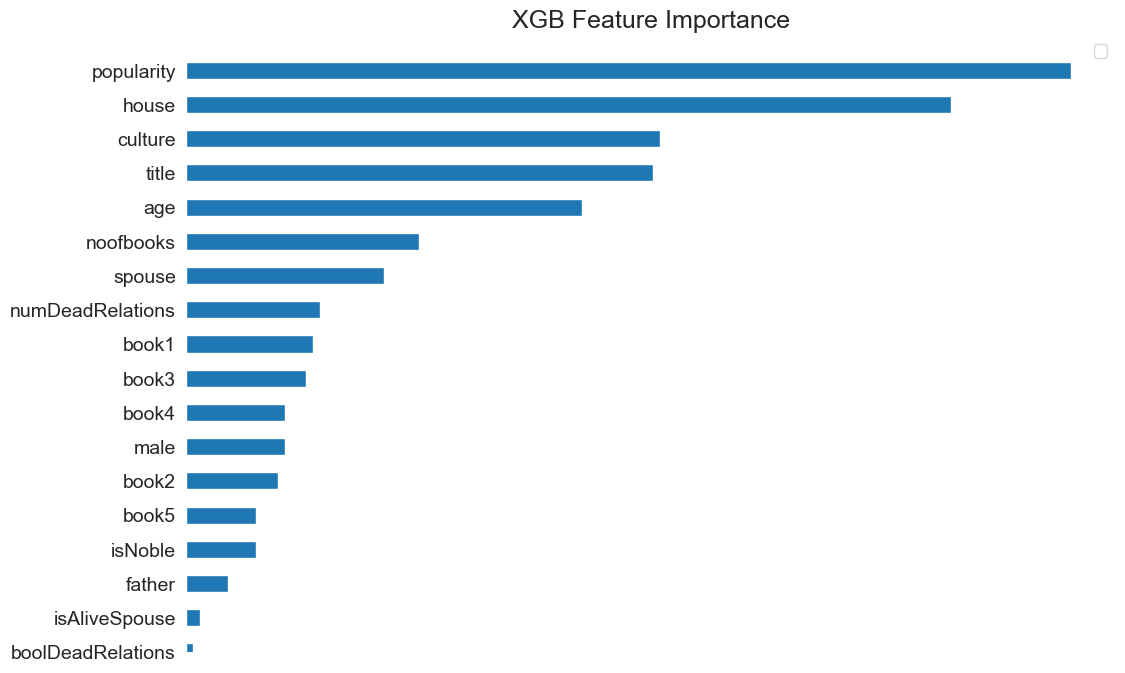

In [49]:
# Importe la classe XGBClassifier de la bibliothèque XGBoost
from xgboost import XGBClassifier as XGBC

# Entraîne un modèle XGBoost sur l'ensemble d'entraînement (X, Y)
clf_xgb = XGBC(subsample=.8, colsample_bytree=.8, seed=14, max_depth=3).fit(X, Y)

# Effectue des prédictions de probabilité sur l'ensemble de test (tX)
preds_xgb = clf_xgb.predict_proba(tX)

# Obtient l'importance des fonctionnalités du modèle
feature_importance = clf_xgb.get_booster().get_fscore()

# Crée un DataFrame à partir des résultats et le trie par ordre croissant
ax = pd.DataFrame(list(feature_importance.items())).set_index(0).sort_values(1).plot.barh(figsize=(12, 8))

# Personnalise le graphique en masquant le cadre, définissant la limite de l'axe y, masquant les étiquettes de l'axe x et la légende
_ = ax.set(frame_on=False, ylim=(0, len(feature_importance)), xticklabels="", xlabel="", ylabel=""), ax.legend("")

# Ajoute un titre au graphique
_ = plt.title("XGB Feature Importance", fontsize=18.)



## Logistic Regression

c:\Users\10172919\AppData\Local\anaconda3\envs\MLOPS\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


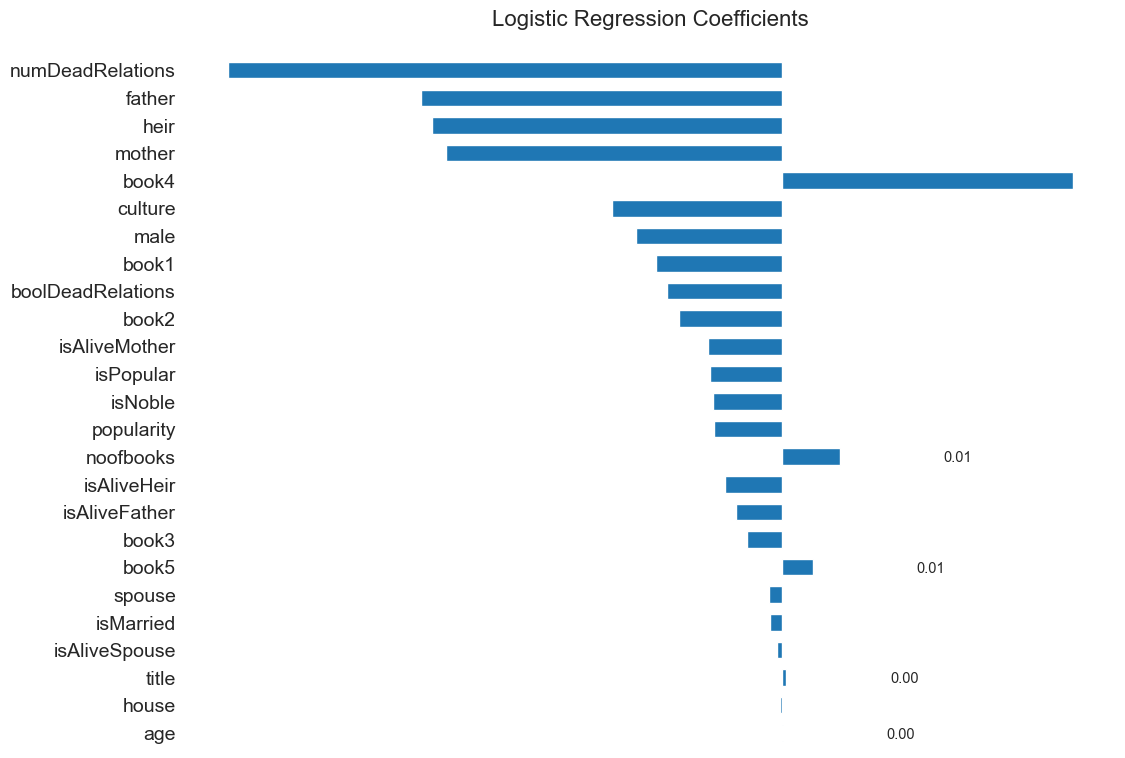

In [50]:
# Importe la classe LogisticRegression de la bibliothèque scikit-learn
from sklearn.linear_model import LogisticRegression

# Entraîne un modèle de régression logistique sur l'ensemble d'entraînement (X, Y)
logreg = LogisticRegression(random_state=14).fit(X, Y)

# Effectue des prédictions de probabilité sur l'ensemble de test (tX)
preds_lr = logreg.predict_proba(tX)

# Crée un DataFrame à partir des coefficients du modèle et trie les résultats par valeur absolue
df = pd.DataFrame(list(zip(tX.columns, logreg.coef_[0])))
df = df.reindex(df[1].abs().sort_values().index).set_index(0)

# Crée un graphique à barres horizontales pour visualiser les coefficients de la régression logistique
ax = df.plot.barh(width=0.6, legend="", figsize=(12, 9))

# Personnalise le graphique en masquant le cadre, en supprimant les étiquettes de l'axe x et y, et en ajoutant les annotations des coefficients
_ = ax.set(frame_on=False, xlabel="", xticklabels="", ylabel="")

# Ajoute un titre au graphique
ax.set_title("Logistic Regression Coefficients", y=1.03, fontsize=16.)

# Ajoute des annotations des coefficients à côté des barres correspondantes
for i, label in enumerate(list(df.index)):
    score = df.loc[label][1]
    ax.annotate('%.2f' % score, (score + (-.12 if score < 0 else .02), i - .2), fontsize=10.5)


## Comparison of XGB Classifier and Logistic Regression¶

Matrice de confusion
Nous voyons d’abord les matrices de confusion pour les deux modèles. Nous les normaliserons par leurs sommes par ligne avant de les visualiser.

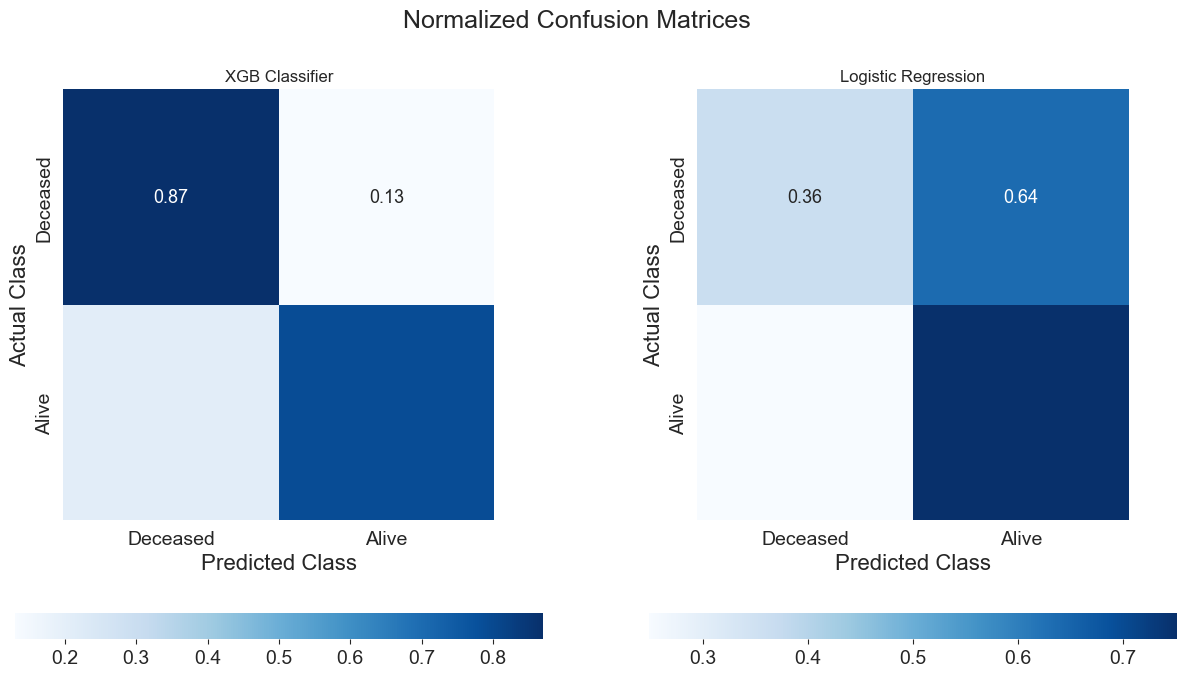

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fonction pour créer une matrice de confusion normalisée et afficher le graphique à chaleur correspondant
def plot_normalized_confusion_matrix(predictions, model_name, ax):
    cm = confusion_matrix(tY, np.argmax(predictions, axis=1))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_normalized, square=True, xticklabels=["Deceased", "Alive"], annot=True,
                annot_kws={"fontsize": 13}, yticklabels=["Deceased", "Alive"],
                cbar=True, cbar_kws={"orientation": "horizontal"}, ax=ax, cmap="Blues").set(
        xlabel="Predicted Class", ylabel="Actual Class", title=model_name)

# Crée une figure avec deux sous-graphiques en une seule ligne
f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Ajoute un titre à la figure
f.suptitle("Normalized Confusion Matrices", fontsize=18.)

# Appelle la fonction pour le modèle XGBoost
plot_normalized_confusion_matrix(preds_xgb, "XGB Classifier", ax[0])

# Appelle la fonction pour le modèle de régression logistique
plot_normalized_confusion_matrix(preds_lr, "Logistic Regression", ax[1])


## Fiche d'évaluation
Ensuite, nous voyons le tableau de bord des deux modèles. Nous utilisons le très pratique classification_report et un certain nombre d'autres fonctions de sklearn.metrics pour examiner différentes mesures d'évaluation telles que l'AUC, la perte de journal et la précision.

In [52]:
# Affiche les performances du modèle XGBoost Classifier
print("XGB Classifier Performance\n" + "=" * 26 + "\n",
      classification_report(tY, np.argmax(preds_xgb, axis=1), target_names=["Deceased", "Alive"]))

# Affiche l'AUC (Area Under the Curve) pour le modèle XGBoost
print("AUC      : %.4f" % roc_auc_score(tY, preds_xgb[:, 1]))

# Affiche l'exactitude (Accuracy) pour le modèle XGBoost
print("Accuracy : %.4f" % accuracy_score(tY, np.argmax(preds_xgb, axis=1)))

# Affiche la perte logarithmique (Log Loss) pour le modèle XGBoost
print("Log Loss : %.4f\n\n" % log_loss(tY, preds_xgb[:, 1]))

# Affiche les performances du modèle de régression logistique
print("Logistic Regression Performance\n" + "=" * 31 + "\n",
      classification_report(tY, np.argmax(preds_lr, axis=1), target_names=["Deceased", "Alive"]))

# Affiche l'AUC pour le modèle de régression logistique
print("AUC      : %.4f" % roc_auc_score(tY, preds_lr[:, 1]))

# Affiche l'exactitude pour le modèle de régression logistique
print("Accuracy : %.4f" % accuracy_score(tY, np.argmax(preds_lr, axis=1)))

# Affiche la perte logarithmique pour le modèle de régression logistique
print("Log Loss : %.4f" % log_loss(tY, preds_lr[:, 1]))


XGB Classifier Performance
               precision    recall  f1-score   support

    Deceased       0.62      0.87      0.72       347
       Alive       0.94      0.79      0.86       899

    accuracy                           0.81      1246
   macro avg       0.78      0.83      0.79      1246
weighted avg       0.85      0.81      0.82      1246

AUC      : 0.8947
Accuracy : 0.8130
Log Loss : 0.4558


Logistic Regression Performance
               precision    recall  f1-score   support

    Deceased       0.36      0.36      0.36       347
       Alive       0.75      0.75      0.75       899

    accuracy                           0.64      1246
   macro avg       0.56      0.56      0.56      1246
weighted avg       0.64      0.64      0.64      1246

AUC      : 0.6003
Accuracy : 0.6437
Log Loss : 0.6749


## Courbes ROC
Enfin, nous examinons les courbes ROC pour les deux modèles.

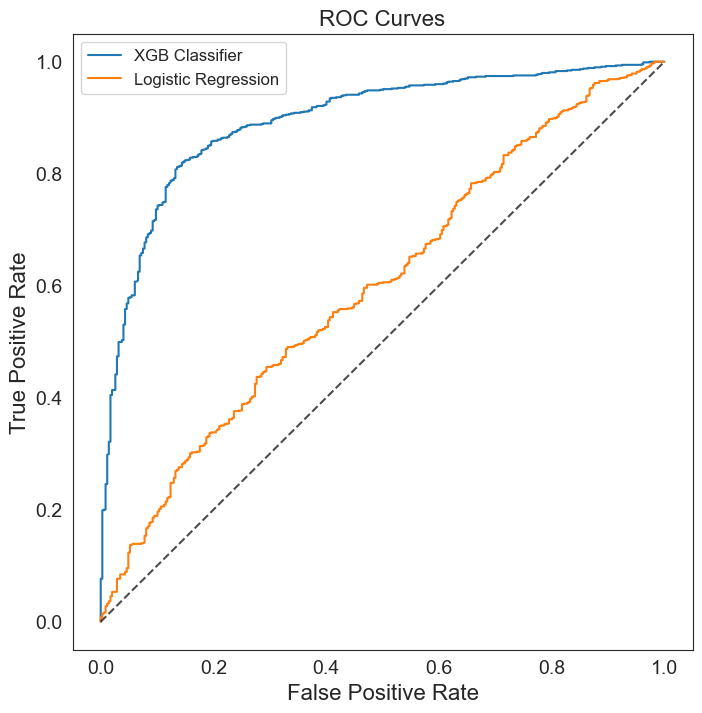

In [53]:
# Crée une figure de taille 8x8 pouces
_ = plt.figure(figsize=(8, 8))

# Trace la courbe ROC pour le modèle XGBoost Classifier
plt.plot(*roc_curve(tY, preds_xgb[:, 1])[:2])

# Trace la courbe ROC pour le modèle de régression logistique
plt.plot(*roc_curve(tY, preds_lr[:, 1])[:2], c=sns.color_palette()[1])

# Trace la ligne en pointillés diagonale (ligne de référence)
plt.plot((0., 1.), (0., 1.), "--k", alpha=.7)

# Ajoute une légende pour indiquer les modèles
plt.legend(["XGB Classifier", "Logistic Regression"], loc="upper left")

# Ajoute des étiquettes et un titre au graphique
_ = plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate"), plt.title("ROC Curves", fontsize=16.)
